In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Kaggle Datasets\Coffe_sales.csv")

In [3]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


# Cleaning Dataset

In [4]:
df.shape

(3547, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [6]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [7]:
df[df.duplicated()]

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time


In [8]:
# seperating date 
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


In [10]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [11]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [12]:
df.drop(columns="Date",inplace=True)

In [13]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Time,Day,Month,Year
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,10:15:50.520000,1,3,2024
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:19:22.539000,1,3,2024
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:20:18.089000,1,3,2024
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,13:46:33.006000,1,3,2024
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,13:48:14.626000,1,3,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,10:34:54.894000,23,3,2025
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,14:43:37.362000,23,3,2025
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,14:44:16.864000,23,3,2025
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,15:47:28.723000,23,3,2025


In [14]:
df["Time"] = pd.to_datetime(df["Time"],format="mixed")
df["Hour"] = df["Time"].dt.hour

In [15]:
df["Time"] = df["Time"].dt.time

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Time         3547 non-null   object 
 10  Day          3547 non-null   int32  
 11  Month        3547 non-null   int32  
 12  Year         3547 non-null   int32  
 13  Hour         3547 non-null   int32  
dtypes: float64(1), int32(4), int64(3), object(6)
memory usage: 332.7+ KB


In [17]:
df.drop(columns="hour_of_day",inplace=True)

In [18]:
df

,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Time,Day,Month,Year,Hour
0,card,38.70,Latte,Morning,Fri,Mar,5,3,10:15:50.520000,1,3,2024,10
1,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:19:22.539000,1,3,2024,12
2,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:20:18.089000,1,3,2024,12
3,card,28.90,Americano,Afternoon,Fri,Mar,5,3,13:46:33.006000,1,3,2024,13
4,card,38.70,Latte,Afternoon,Fri,Mar,5,3,13:48:14.626000,1,3,2024,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,10:34:54.894000,23,3,2025,10
3543,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,14:43:37.362000,23,3,2025,14
3544,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,14:44:16.864000,23,3,2025,14
3545,card,25.96,Americano,Afternoon,Sun,Mar,7,3,15:47:28.723000,23,3,2025,15


# Visualization

In [19]:
# popular coffee in terms of total sales

In [20]:
coffee = df["coffee_name"].value_counts()

In [21]:
coffee

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

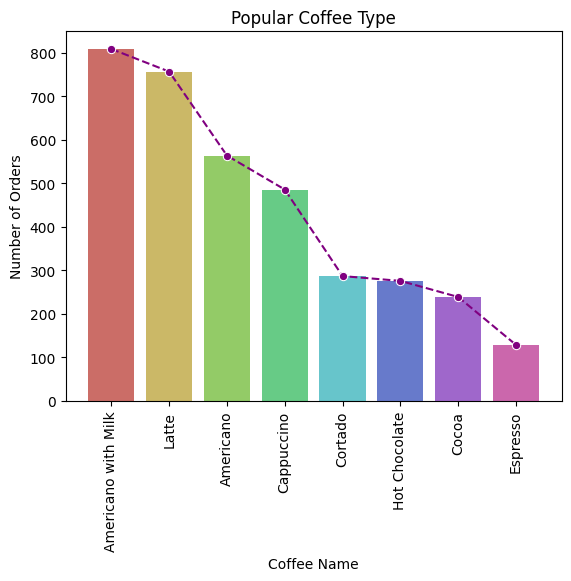

In [22]:
plt.title("Popular Coffee Type")
sns.barplot(data=coffee,palette="hls")
sns.lineplot(data=coffee,color="purple",marker="o",linestyle="--")
plt.xlabel("Coffee Name")
plt.xticks(rotation=90)
plt.ylabel("Number of Orders")
plt.show()

In [23]:
# popular payment meathod

In [24]:
meathod = df["cash_type"].value_counts()

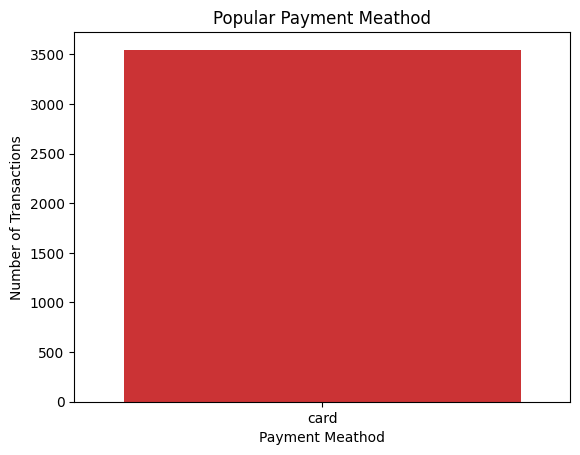

In [25]:
plt.title("Popular Payment Meathod")
sns.barplot(data=meathod,palette="Set1")
plt.xlabel("Payment Meathod")
plt.ylabel("Number of Transactions")
plt.show()

In [26]:
# sales analysis

In [27]:
hourly_sales = df["Hour"].value_counts()
daily_sales = df["Day"].value_counts()
monthly_sales = df["Month"].value_counts()
yealy_sales = df["Year"].value_counts()

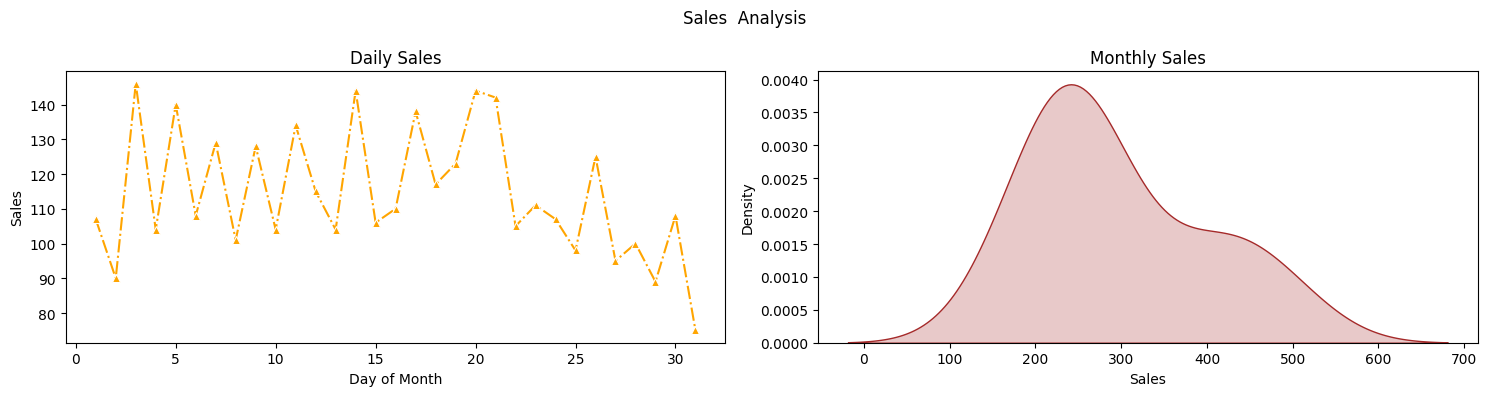

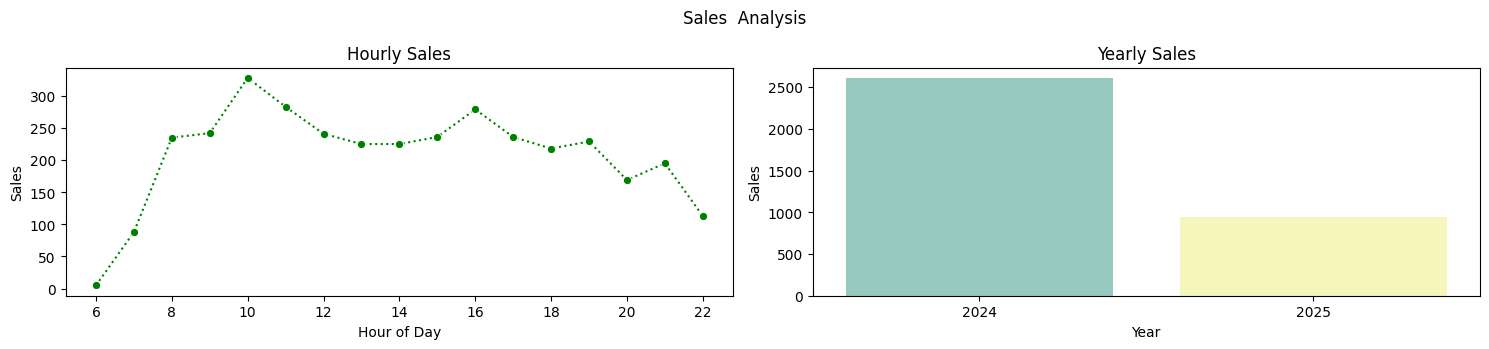

In [36]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(data=daily_sales,linestyle="dashdot",marker="^",color="orange")
plt.xlabel("Day of Month")
plt.ylabel("Sales")
plt.title("Daily Sales")
plt.subplot(1,2,2)
sns.kdeplot(data=monthly_sales,color="brown",fill=True)
plt.xlabel("Sales")
plt.title("Monthly Sales")
plt.suptitle("Sales  Analysis")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.lineplot(data=hourly_sales,linestyle="dotted",marker="o",color="green")
plt.xlabel("Hour of Day")
plt.ylabel("Sales")
plt.title("Hourly Sales")
plt.subplot(2,2,2)
sns.barplot(data=yealy_sales,palette="Set3")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sales")
plt.suptitle("Sales  Analysis")
plt.tight_layout()
plt.show()

In [29]:
weekly_sales = df["Weekday"].value_counts()

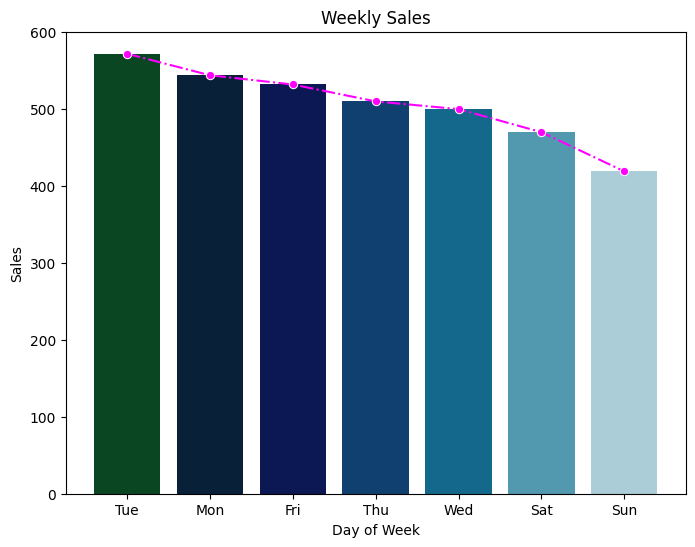

In [30]:
# weekly sales
plt.figure(figsize=(8,6))
sns.barplot(data=weekly_sales,palette="ocean")
sns.lineplot(data=weekly_sales,linestyle="dashdot",marker="o",color="magenta")
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.title("Weekly Sales")
plt.show()

# Creating Machine Learning Model

In [42]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import RidgeCV

In [32]:
x = df[["Day","Month","Year"]]
y = df["money"]
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# selecting best alpha
model_rigde_cv = RidgeCV(alphas=[0.1,0.5,1,10,50,1000])
model_rigde_cv.fit(x_train,y_train)
print("best alpha:" , model_rigde_cv.alpha_)

best alpha: 10.0


In [46]:
# fitting and predicting model
models = {"linear_model" : LinearRegression(),
         "Ridge_model" : Ridge(alpha=10),
         "lasso_model" : Lasso(alpha=10),
         "elastic_net_model" : ElasticNet(alpha=10,l1_ratio=0.5)}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

mean = mean_squared_error(y_test,y_pred)
mean_absolute = mean_absolute_error(y_test,y_pred)
print("mean squared error :", round(mean,3))
print("mean aboslute error :", round(mean_absolute,3))

mean squared error : 23.371
mean aboslute error : 4.174
